In [14]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [15]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()

In [16]:
df = web.DataReader('AAPL', 'yahoo', start, end) 

In [17]:
df.info(), df.head(), df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2020-01-02 to 2020-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       123 non-null    float64
 1   Low        123 non-null    float64
 2   Open       123 non-null    float64
 3   Close      123 non-null    float64
 4   Volume     123 non-null    float64
 5   Adj Close  123 non-null    float64
dtypes: float64(6)
memory usage: 6.7 KB


(None,
                   High         Low        Open       Close      Volume  \
 Date                                                                     
 2020-01-02  300.600006  295.190002  296.239990  300.350006  33870100.0   
 2020-01-03  300.579987  296.500000  297.149994  297.429993  36580700.0   
 2020-01-06  299.959991  292.750000  293.790009  299.799988  29596800.0   
 2020-01-07  300.899994  297.480011  299.839996  298.390015  27218000.0   
 2020-01-08  304.440002  297.160004  297.160004  303.190002  33019800.0   
 
              Adj Close  
 Date                    
 2020-01-02  298.829956  
 2020-01-03  295.924713  
 2020-01-06  298.282715  
 2020-01-07  296.879883  
 2020-01-08  301.655548  ,
              High         Low        Open       Close        Volume  \
 count  123.000000  123.000000  123.000000  123.000000  1.230000e+02   
 mean   305.185121  296.423821  300.215448  301.131138  4.320196e+07   
 std     30.350709   32.281673   31.660389   31.493542  1.890308e+0

In [18]:
prices = df['Close'] # We get the 'Close' column 

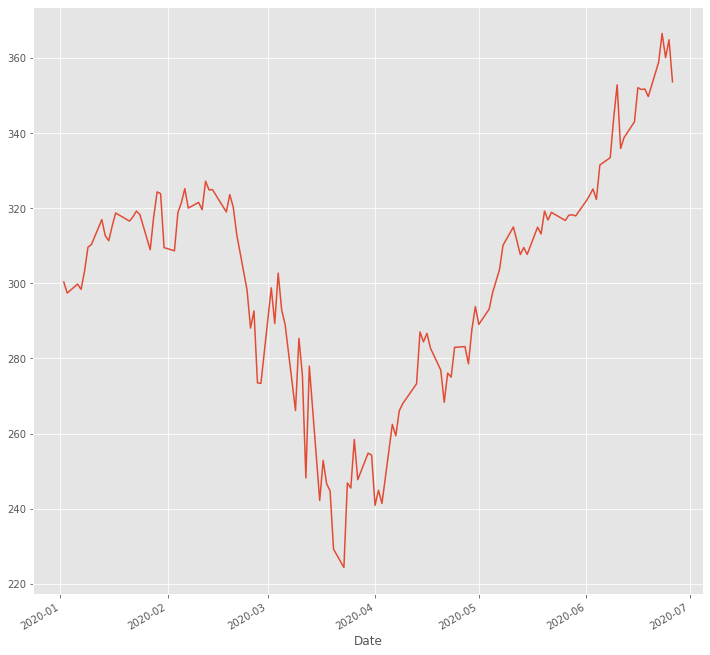

In [19]:
prices.plot(figsize=(12,12))

In [20]:
returns = prices.pct_change() # Percentage change between the current and a prior element.

In [21]:
last_price = prices[-1]

In [22]:
#Preparing to initiate the Simulatiion
# Define Variables : 
# No. of Trials (Simulations)
num_of_simul = 1000
# Define the time horizon ----> Usually the trading days within a year
num_of_days = 252

In [23]:
# Create a DataFrame for the Simulation Trials 
df_simul = pd.DataFrame()

In [24]:
for x in range(num_of_simul):
    count = 0
    daily_vol = returns.std() # We need the daily std for the Monte Carlo Simulation (Daily Volatility)
    # List to append all the given prices for thar year
    price_series = [] 
    price = last_price * (1 + np.random.normal(0, daily_vol))# Start the list with one initial value and create random prices(!!Random Shock!!) ---> (the daily volatility ---> 
                                                        # statistical measure of the dispersion of returns for a given security or market index)
                                                        # Volatility is often calculated using variance and standard deviation. 
    price_series.append(price) # Append price to the list
    for y in range(num_of_days):
        if count == 251: # Because Pandas starts at 0
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))   #count to underscore the individual items in the series
        price_series.append(price)
        count += 1
    df_simul[x] = price_series   

In [25]:
df_simul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Columns: 1000 entries, 0 to 999
dtypes: float64(1000)
memory usage: 1.9 MB


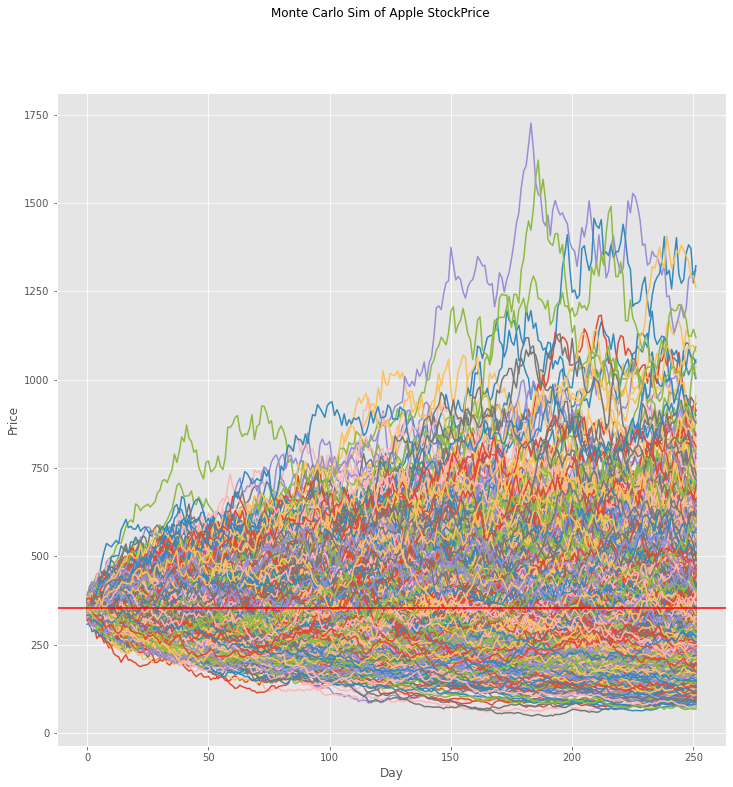

In [26]:
# Plot the Simulation 
fig = plt.figure(figsize=(12,12))
fig.suptitle('Monte Carlo Sim of Apple StockPrice')
plt.plot(df_simul)
plt.axhline(y=last_price, color='r', linestyle='-') # Current Price
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()